In [43]:
import numpy as np
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import seaborn as sns
from textgenrnn import textgenrnn

/Users/bassim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
my_page = 'https://www.quora.com/profile/Bassim-Eledath-1'
page = urllib.request.urlopen(my_page)
soup = BeautifulSoup(page, 'html.parser')

In [20]:
links = soup.find_all('a', href=True)
list_questions = []
for link in links:
    list_questions.append(link['href'])

In [21]:
my_stats = []
numbers = []
labels = []
for x in soup.find_all('a',href=True):
    if x.find_all('span', {'class' : 'list_count'})!=[]:
        my_stats.append(x.text)
        
for x in my_stats:
    numbers.append(re.findall('\d+', x ))
numbers = [int(item) for sublist in numbers for item in sublist]
for x in my_stats:
    word = ''.join([i for i in x if not i.isdigit()])
    labels.append(word)


In [22]:
# formatting 
questions = []
knows_about = []
for x in list_questions:
    if x.find('#') == -1:
        if x.find('profile') == -1:
            if x.find('api') == -1:
                x = x.replace('/','')
                x = x.replace('-',' ')
                x = x.replace('Bassim Eledath','')
                x = x.replace('answer 1','')
                if x.startswith('topic'):
                    x = x.replace('topic','')
                    x = x.replace(' 1','')
                    knows_about.append(x)
                else:
                    questions.append(x)


In [29]:
questions  = list(set([x for x in questions if x not in ['','about', 'careers', 'aboutprivacy', 'abouttos','contact']]))
knows_about = list(set(knows_about))
page_title = soup.title.string
answers = [x.text for x in soup.find_all('p')]

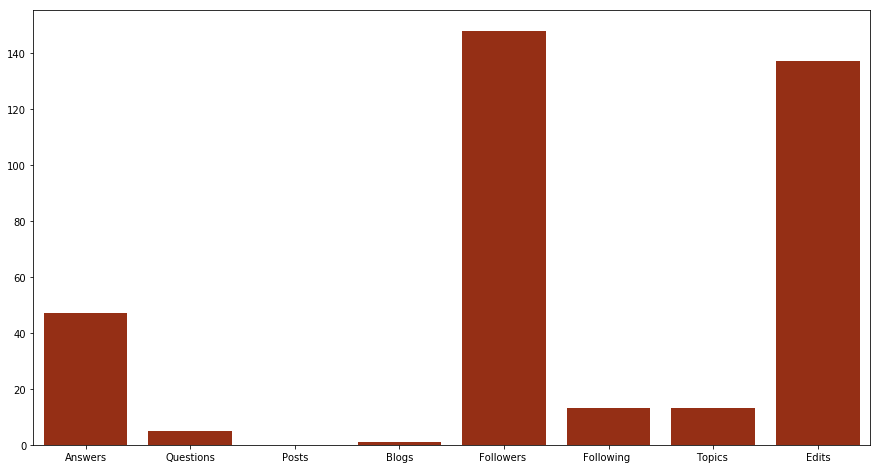

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=labels,y=numbers,color='#AA2200')


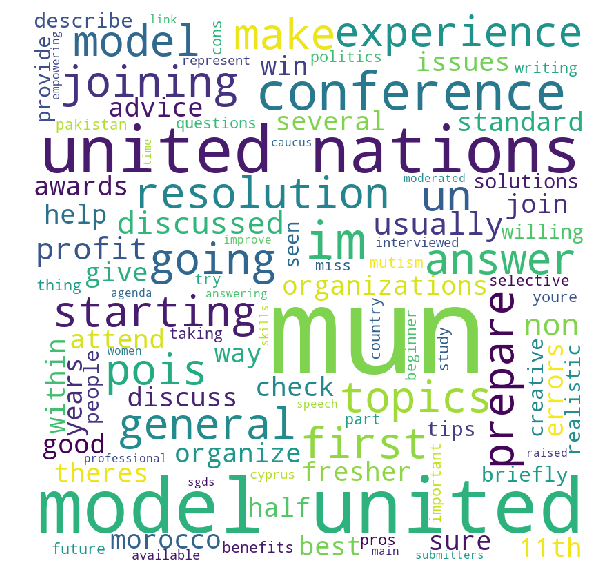

In [33]:
# wordcloud of questions
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in questions: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

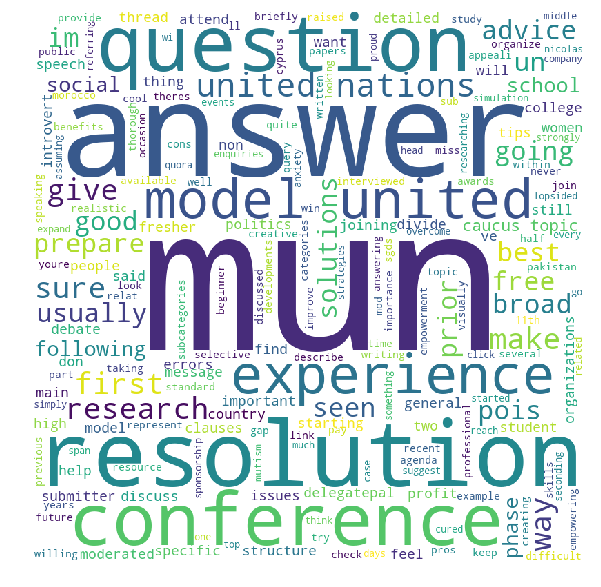

In [34]:
# wordcloud of answers 

for val in answers: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [39]:
# writing to text files

with open("questions.txt", "w") as output:
    output.write(str(questions))
with open("answers.txt", "w") as output:
    output.write(str(answers[1:]))

In [55]:
textgen = textgenrnn()
textgen.train_on_texts(answers, num_epochs=3)
textgen.generate(2)

Training on 2,957 character sequences.
Epoch 1/3
23/23 [==============================] - 10s 446ms/step - loss: 1.8720
####################
Temperature: 0.2
####################
I am every resorgered answer and a solutions are your submitter and solutions and solutions and solutions are resolution and sure the solutions are your college and sure an answer and a solutions are your resolution and solutions and solutions and solutions are your solutions and solutions and sur

I am a lot of the submitter answer answer and a college solution resolution to solutions and solutions and solutions are your resolution and solutions to your submitter to a solutions and solutions and solutions are your solutions and said and solutions solutions and solutions and solutions are yo

I would say this your school has an answer is a solution resolution and solutions and solutions and solutions solutions and solutions and solutions are your resolution.

####################
Temperature: 0.5
#############

In [56]:
textgen.train_on_texts(questions, num_epochs=3)
textgen.generate(2)

Training on 1,606 character sequences.
Epoch 1/3
12/12 [==============================] - 5s 377ms/step - loss: 1.3984
####################
Temperature: 0.2
####################
What is a free to a conference and I want to make sure of a free and most conferences in MUN in MUN in MUN

What are my speech answers in MUN in MUN in MUN in MUN in MUN

What is strateging MUN in MUN in MUN in MUN

####################
Temperature: 0.5
####################
What is a model resolution of my conferenced experience with MUN in the most is a free for the for a free to a free resolution in MUN in MUN

What are regatePro of a resolution and sure of what  in MUN is speech in the most interviewed for its study with resolutions for a speech care with a proof answer resolution of making a MUN in your school in MUN in MUN

What are my papers are it in MUN in MUN

####################
Temperature: 1.0
####################
This puratic starter is a conferencurips.

What food way not is the some interformati